In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
!pwd

/content/drive/My Drive/패턴인식론


In [72]:
%cd drive/MyDrive/패턴인식론

[Errno 2] No such file or directory: 'drive/MyDrive/패턴인식론'
/content/drive/MyDrive/패턴인식론


### Preprocessing

In [73]:
import pandas as pd

df = pd.read_excel('./1.xlsx')
df.head(20)

,구분,색상 데이터,Unnamed: 2,Unnamed: 3,Unnamed: 4,혈당,Unnamed: 6
0,NaN,식전,NaN,식후,NaN,식전혈당,식후혈당
1,NaN,Cr,Co,Cr,Co,NaN,NaN
2,피험자1,155.27979,169.50243,152.24653,164.81236,100,145
3,NaN,152.00934,162.97954,152.7672,165.44173,100,145
4,NaN,151.72183,161.80089,153.40458,162.0119,88,140
5,NaN,152.99056,165.18735,153.68712,162.87988,88,140
6,NaN,152.35676,162.64885,152.07726,162.7552,110,132
7,NaN,153.4972,165.16999,153.14213,165.22599,110,132
8,피험자2,152.8088,161.07788,150.3052,157.28727,104,110
9,NaN,153.69724,160.5962,152.94012,160.46573,104,110


In [74]:
df = df.drop(index=[0,1],axis=0)
df.head(20)

,구분,색상 데이터,Unnamed: 2,Unnamed: 3,Unnamed: 4,혈당,Unnamed: 6
2,피험자1,155.27979,169.50243,152.24653,164.81236,100,145
3,NaN,152.00934,162.97954,152.7672,165.44173,100,145
4,NaN,151.72183,161.80089,153.40458,162.0119,88,140
5,NaN,152.99056,165.18735,153.68712,162.87988,88,140
6,NaN,152.35676,162.64885,152.07726,162.7552,110,132
7,NaN,153.4972,165.16999,153.14213,165.22599,110,132
8,피험자2,152.8088,161.07788,150.3052,157.28727,104,110
9,NaN,153.69724,160.5962,152.94012,160.46573,104,110
10,NaN,152.19966,157.68141,150.49411,156.27444,100,124
11,NaN,154.85222,160.81296,153.24656,160.20195,100,124


In [75]:
df = df.rename(columns={'색상 데이터' : 'x10'})
df = df.rename(columns={'Unnamed: 2' : 'x11'})
df = df.rename(columns={'Unnamed: 3' : 'x20'})
df = df.rename(columns={'Unnamed: 4' : 'x21'})
df = df.rename(columns={'혈당' : 'y1'})
df = df.rename(columns={'Unnamed: 6' : 'y2'})

In [76]:
df.head(20)

,구분,x10,x11,x20,x21,y1,y2
2,피험자1,155.27979,169.50243,152.24653,164.81236,100,145
3,NaN,152.00934,162.97954,152.7672,165.44173,100,145
4,NaN,151.72183,161.80089,153.40458,162.0119,88,140
5,NaN,152.99056,165.18735,153.68712,162.87988,88,140
6,NaN,152.35676,162.64885,152.07726,162.7552,110,132
7,NaN,153.4972,165.16999,153.14213,165.22599,110,132
8,피험자2,152.8088,161.07788,150.3052,157.28727,104,110
9,NaN,153.69724,160.5962,152.94012,160.46573,104,110
10,NaN,152.19966,157.68141,150.49411,156.27444,100,124
11,NaN,154.85222,160.81296,153.24656,160.20195,100,124


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 2 to 91
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      15 non-null     object
 1   x10     90 non-null     object
 2   x11     90 non-null     object
 3   x20     90 non-null     object
 4   x21     90 non-null     object
 5   y1      90 non-null     object
 6   y2      90 non-null     object
dtypes: object(7)
memory usage: 5.6+ KB


In [78]:
df.shape

(90, 7)

In [79]:
df.index

Int64Index([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
            36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
            53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
            70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
            87, 88, 89, 90, 91],
           dtype='int64')

In [80]:

df.loc[[3,4,5,6,7],['구분']] = 1

df.loc[[9,10,11,12,13],['구분']] = 2
df.loc[[15,16,17,18,19],['구분']] = 3
df.loc[[21,22,23,24,25],['구분']] = 4
df.loc[[27,28,29,30,31],['구분']] = 5
df.loc[[33,34,35,36,37],['구분']] = 6
df.loc[[39,40,41,42,43],['구분']] = 7
df.loc[[45,46,47,48,49],['구분']] = 8
df.loc[[51,52,53,54,55],['구분']] = 9
df.loc[[57,58,59,60,61],['구분']] = 10
df.loc[[63,64,65,66,67],['구분']] = 11
df.loc[[69,70,71,72,73],['구분']] = 12
df.loc[[75,76,77,78,79],['구분']] = 13
df.loc[[81,82,83,84,85],['구분']] = 14
df.loc[[86,87,88,89,90],['구분']] = 15

df.head()

,구분,x10,x11,x20,x21,y1,y2
2,피험자1,155.27979,169.50243,152.24653,164.81236,100,145
3,1,152.00934,162.97954,152.7672,165.44173,100,145
4,1,151.72183,161.80089,153.40458,162.0119,88,140
5,1,152.99056,165.18735,153.68712,162.87988,88,140
6,1,152.35676,162.64885,152.07726,162.7552,110,132


In [81]:
df.head(20)

,구분,x10,x11,x20,x21,y1,y2
2,피험자1,155.27979,169.50243,152.24653,164.81236,100,145
3,1,152.00934,162.97954,152.7672,165.44173,100,145
4,1,151.72183,161.80089,153.40458,162.0119,88,140
5,1,152.99056,165.18735,153.68712,162.87988,88,140
6,1,152.35676,162.64885,152.07726,162.7552,110,132
7,1,153.4972,165.16999,153.14213,165.22599,110,132
8,피험자2,152.8088,161.07788,150.3052,157.28727,104,110
9,2,153.69724,160.5962,152.94012,160.46573,104,110
10,2,152.19966,157.68141,150.49411,156.27444,100,124
11,2,154.85222,160.81296,153.24656,160.20195,100,124


In [82]:
df.head()

,구분,x10,x11,x20,x21,y1,y2
2,피험자1,155.27979,169.50243,152.24653,164.81236,100,145
3,1,152.00934,162.97954,152.7672,165.44173,100,145
4,1,151.72183,161.80089,153.40458,162.0119,88,140
5,1,152.99056,165.18735,153.68712,162.87988,88,140
6,1,152.35676,162.64885,152.07726,162.7552,110,132


In [83]:
df.loc[[2],['구분']] = 1
df.loc[[8],['구분']] = 2
df.loc[[14],['구분']] = 3
df.loc[[20],['구분']] = 4
df.loc[[26],['구분']] = 5
df.loc[[32],['구분']] = 6
df.loc[[38],['구분']] = 7
df.loc[[44],['구분']] = 8
df.loc[[50],['구분']] = 9
df.loc[[56],['구분']] = 10
df.loc[[62],['구분']] = 11
df.loc[[68],['구분']] = 12
df.loc[[74],['구분']] = 13
df.loc[[80],['구분']] = 14


In [84]:
df.head(90)

,구분,x10,x11,x20,x21,y1,y2
2,1,155.27979,169.50243,152.24653,164.81236,100,145
3,1,152.00934,162.97954,152.7672,165.44173,100,145
4,1,151.72183,161.80089,153.40458,162.0119,88,140
5,1,152.99056,165.18735,153.68712,162.87988,88,140
6,1,152.35676,162.64885,152.07726,162.7552,110,132
...,...,...,...,...,...,...,...
87,15,151.16241,159.57965,152.28608,160.83481,87,113
88,15,152.29895,167.74208,154.06758,163.80259,100,145
89,15,152.71286,168.93042,154.75304,164.51277,100,145
90,15,156.46441,160.24118,151.64322,161.30815,103,111


In [85]:
df.head(20)

,구분,x10,x11,x20,x21,y1,y2
2,1,155.27979,169.50243,152.24653,164.81236,100,145
3,1,152.00934,162.97954,152.7672,165.44173,100,145
4,1,151.72183,161.80089,153.40458,162.0119,88,140
5,1,152.99056,165.18735,153.68712,162.87988,88,140
6,1,152.35676,162.64885,152.07726,162.7552,110,132
7,1,153.4972,165.16999,153.14213,165.22599,110,132
8,2,152.8088,161.07788,150.3052,157.28727,104,110
9,2,153.69724,160.5962,152.94012,160.46573,104,110
10,2,152.19966,157.68141,150.49411,156.27444,100,124
11,2,154.85222,160.81296,153.24656,160.20195,100,124


In [86]:
df.loc[[91],['구분']] = 15

In [87]:
df.tail()

,구분,x10,x11,x20,x21,y1,y2
87,15,151.16241,159.57965,152.28608,160.83481,87,113
88,15,152.29895,167.74208,154.06758,163.80259,100,145
89,15,152.71286,168.93042,154.75304,164.51277,100,145
90,15,156.46441,160.24118,151.64322,161.30815,103,111
91,15,157.78163,162.01563,152.41701,161.93299,103,111


### Model Configuration

In [88]:
import numpy as np
from sklearn.model_selection import train_test_split

# 피험자의 구분은 중요하지 않다 가정
df = df.sample(frac=1)
# df.head()
x = df[['x10','x11','x20','x21']]
print("input's shape:",x.shape)

y = df[['y1','y2']]
print("output's shape:",y.shape)

trainX, testX, trainY, testY = train_test_split(x,y,train_size=0.7,test_size=0.3)
print(trainX.shape,testX.shape,trainY.shape,testY.shape)

input's shape: (90, 4)
output's shape: (90, 2)
(62, 4) (27, 4) (62, 2) (27, 2)


In [90]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(trainX,trainY)
print("가중치(계수, 기울기 파라미터 W) :", model.coef_)
print("편향(절편 파라미터 b) :", model.intercept_)

print("훈련세트 점수: {:.2f}".format( model.score(trainX, trainY) ))
print("테스트세트 점수: {:.2f}".format( model.score(testX, testY) ))

가중치(계수, 기울기 파라미터 W) : [[ 1.05099308 -0.58895656 -0.27835931 -0.60800923]
 [-1.54667949  0.68039188  0.99174283 -1.15481019]]
편향(절편 파라미터 b) : [178.0230069  287.97617111]
훈련세트 점수: 0.10
테스트세트 점수: 0.06


In [91]:
pred_y = model.predict(testX)
print(pred_y)

[[112.73114817 137.3179266 ]
 [ 99.24005614 124.59314958]
 [103.09375281 127.8752524 ]
 [ 99.76961304 121.81043772]
 [ 94.0299327  126.90818515]
 [ 98.72388753 119.69729923]
 [ 99.71414266 128.06369452]
 [101.05251182 129.31034837]
 [ 98.80474884 123.7985924 ]
 [103.32586969 128.30043201]
 [107.36737746 130.65008206]
 [ 97.27610757 123.75448971]
 [101.06701558 125.86421983]
 [ 98.68163127 124.20837684]
 [109.54770588 133.35867795]
 [107.79386357 135.43402252]
 [109.38436646 137.48380364]
 [114.1272381  133.83594047]
 [100.95245332 126.83066537]
 [103.88825166 129.97014474]
 [101.47627877 128.1284644 ]
 [100.98158153 128.44403845]
 [107.3994471  136.31135636]
 [100.20715861 127.6482405 ]
 [104.83660623 125.89395902]
 [105.6637852  129.04105212]
 [103.51661746 126.58865367]]


In [92]:
print(testY)

     y1   y2
36  111  124
81   89  123
15  100  123
41  102  124
48  103  154
66  115  157
5    88  140
70  106  123
2   100  145
16   98  107
25   96  139
47   92  132
6   110  132
3   100  145
12  118  128
45  100  174
44  100  174
34  117  129
74   97  130
72   96  126
68  110  141
4    88  140
55  118  134
43   89  115
9   104  110
63  103  177
39   97   92


In [93]:
len(testY)

27

In [94]:
import numpy as np
MSE = ((testY - pred_y)**2).sum()/len(testY)
print(MSE)
print(MSE[0])
RMSE1 = np.sqrt(MSE[0])
RMSE2 = np.sqrt(MSE[1])
print(RMSE1, RMSE2)

y1     64.208116
y2    412.568323
dtype: object
64.20811607676417
8.012996697663375 20.311777938262143


In [96]:
df.head()

,구분,x10,x11,x20,x21,y1,y2
5,1,152.99056,165.18735,153.68712,162.87988,88,140
50,9,151.17757,161.62224,149.95046,162.30658,87,106
43,7,151.06822,161.45537,152.7344,162.7973,89,115
83,14,152.93983,165.97724,153.51251,162.65809,90,124
60,10,155.41624,165.20504,152.87248,162.85465,116,146


In [110]:
df.columns

AttributeError: ignored

(90,)
(90,)


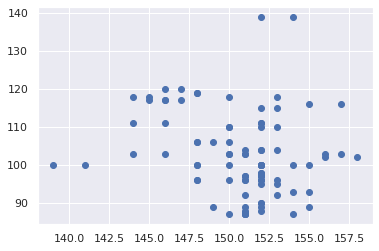

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import numpy as np
df=df.astype('int')
x10 = df['x10'].to_numpy()
x11 = df['x11'].to_numpy()
x20 = df['x20'].to_numpy()
x21 = df['x21'].to_numpy()
y1 = df['y1'].to_numpy()
y2 = df['y1'].to_numpy()
print(x10.shape)
print(y1.shape)
plt.scatter(x10,y1)
# ax = sns.scatterplot(x=df.columns[1],y=df.columns[-1])

(27, 4)
(27, 2)
(27,)
(27,)


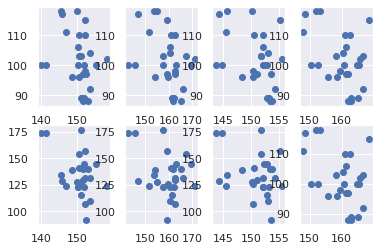

In [142]:
testX_numpy = testX.to_numpy()
testY_numpy = testY.to_numpy()
print(testX_numpy.shape)
print(testY_numpy.shape)

fig = plt.figure()
axes1 = fig.add_subplot(2,4,1)
axes2 = fig.add_subplot(2,4,2)
axes3 = fig.add_subplot(2,4,3)
axes4 = fig.add_subplot(2,4,4)
axes5 = fig.add_subplot(2,4,5)
axes6 = fig.add_subplot(2,4,6)
axes7 = fig.add_subplot(2,4,7)
axes8 = fig.add_subplot(2,4,8)
print(testX_numpy[:,0].shape)
print(testY_numpy[:,0].shape)

axes1.scatter(testX_numpy[:,0],testY_numpy[:,0]) #x10과 y10
axes2.scatter(testX_numpy[:,1],testY_numpy[:,0]) #x11과 y10
axes3.scatter(testX_numpy[:,2],testY_numpy[:,0]) #x20과 y10
axes4.scatter(testX_numpy[:,3],testY_numpy[:,0]) #x21과 y10
axes5.scatter(testX_numpy[:,0],testY_numpy[:,1]) #x10과 y11
axes6.scatter(testX_numpy[:,1],testY_numpy[:,1]) #x11과 y11
axes7.scatter(testX_numpy[:,2],testY_numpy[:,1]) #x20과 y11
axes8.scatter(testX_numpy[:,3],testY_numpy[:,0]) #x21과 y11


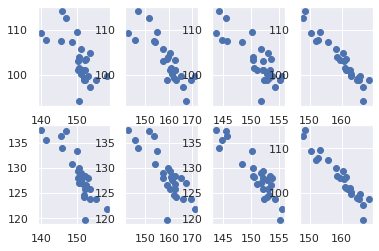

In [144]:
fig = plt.figure()
axes1 = fig.add_subplot(2,4,1)
axes2 = fig.add_subplot(2,4,2)
axes3 = fig.add_subplot(2,4,3)
axes4 = fig.add_subplot(2,4,4)
axes5 = fig.add_subplot(2,4,5)
axes6 = fig.add_subplot(2,4,6)
axes7 = fig.add_subplot(2,4,7)
axes8 = fig.add_subplot(2,4,8)

axes1.scatter(testX_numpy[:,0],pred_y[:,0]) #x10과 y10
axes2.scatter(testX_numpy[:,1],pred_y[:,0]) #x11과 y10
axes3.scatter(testX_numpy[:,2],pred_y[:,0]) #x20과 y10
axes4.scatter(testX_numpy[:,3],pred_y[:,0]) #x21과 y10
axes5.scatter(testX_numpy[:,0],pred_y[:,1]) #x10과 y11
axes6.scatter(testX_numpy[:,1],pred_y[:,1]) #x11과 y11
axes7.scatter(testX_numpy[:,2],pred_y[:,1]) #x20과 y11
axes8.scatter(testX_numpy[:,3],pred_y[:,0]) #x21과 y11

In [145]:
# 오차율
error_rate=(np.abs(testY_numpy-pred_y)/testY_numpy)*100
print(error_rate)

[[1.5595929451553974 10.740263383361354]
 [11.505681060215826 1.2952435577971748]
 [3.0937528063059716 3.9636198390567876]
 [2.186653886411858 1.7657760321673588]
 [8.708803200466761 17.592087566726605]
 [14.153141274153711 23.759682017122998]
 [13.31152574680163 8.52593248547255]
 [4.6674416777743994 5.1303645264365]
 [1.1952511646328219 14.621660411070664]
 [5.434560909692344 19.906945800924206]
 [11.841018186984414 6.007135207474621]
 [5.7348995350678456 6.246598705660058]
 [8.120894928089385 4.648318311037299]
 [1.3183687286871475 14.339050456425067]
 [7.162961117427286 4.18646714921016]
 [7.793863571151532 22.164354873520757]
 [9.384366460397985 20.986319749508933]
 [2.455352048361223 3.7487910615411457]
 [4.074694140786153 2.4379497157830508]
 [8.216928807338835 3.150908520968477]
 [7.74883748094838 9.12874865487692]
 [14.751797191724753 8.254258249662131]
 [8.983519409525677 1.7248928028019912]
 [12.592313044315615 10.998470000577566]
 [0.8044290685460873 14.449053655902603]
 [2

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 5 to 41
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   구분      90 non-null     int64
 1   x10     90 non-null     int64
 2   x11     90 non-null     int64
 3   x20     90 non-null     int64
 4   x21     90 non-null     int64
 5   y1      90 non-null     int64
 6   y2      90 non-null     int64
dtypes: int64(7)
memory usage: 5.6 KB


In [ ]:
df=df.astype('float')

In [ ]:
x = torch.FloatTensor([
    [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]
])
x.shape

torch.Size([6, 2])

In [ ]:
import torch
from torch import nn
from torch import optim
model = nn.Linear(4, 2,bias=False)
df=df.astype('float')
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
df[['x10','x11','x20','x21']]
trainX = torch.tensor(df[['x10','x11','x20','x21']].values).float()
print(trainX.shape)
trainY = torch.tensor(df[['y1','y2']].values).float()
print(trainY.shape)
for epoch in range(10):
    output = model(trainX)
    cost = criterion(output, trainY)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if (epoch + 1) % 1 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

torch.Size([90, 4])
torch.Size([90, 2])
Epoch :    1, Model : [Parameter containing:
tensor([[25.8310, 26.6295, 25.8861, 27.0678],
        [55.6908, 58.6715, 55.8586, 58.2051]], requires_grad=True)], Cost : 1067.164
Epoch :    2, Model : [Parameter containing:
tensor([[-24628.8359, -26069.9473, -24655.4883, -26081.1621],
        [-53516.5117, -56646.4609, -53574.2656, -56672.1250]],
       requires_grad=True)], Cost : 761139200.000
Epoch :    3, Model : [Parameter containing:
tensor([[23855410., 25250422., 23881234., 25261710.],
        [51835328., 54866572., 51891456., 54891096.]], requires_grad=True)], Cost : 714057036333056.000
Epoch :    4, Model : [Parameter containing:
tensor([[-2.3106e+10, -2.4457e+10, -2.3131e+10, -2.4468e+10],
        [-5.0207e+10, -5.3143e+10, -5.0261e+10, -5.3166e+10]],
       requires_grad=True)], Cost : 669887504360759361536.000
Epoch :    5, Model : [Parameter containing:
tensor([[2.2380e+13, 2.3689e+13, 2.2404e+13, 2.3699e+13],
        [4.8629e+13, 5.147